In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb
from math import ceil,sqrt,cos,pi
import pylab
from scipy import fftpack
import matplotlib.cm as cm
from collections import Counter
from utils import *

In [2]:
import imageio as iio
 
# read an image
img = iio.imread("sample_img.jpeg")

In [3]:
#img
image_r = img[:,:,0]
image_g = img[:,:,1]
image_b = img[:,:,2]
image_b.shape

(667, 1000)

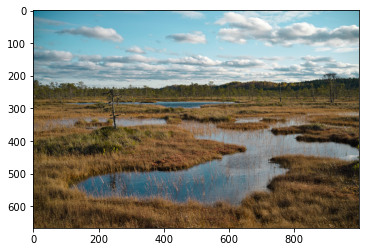

In [4]:
#rng = np.random.default_rng()
#image_r = rng.random((100,100))
#image_g = rng.random((100,100))
#image_b = rng.random((100,100))
#image = make_lupton_rgb(image_r, image_g, image_b, stretch=0.5)
plt.imshow(img)

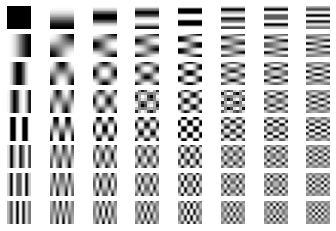

In [5]:
n = 8
DCTs = []
for u in range(0, n):
    for v in range(0, n):
        basisImg = getBasisImage(u, v, n)
        DCTs.append(basisImg)

pylab.figure("DCT")
for i in range(0, len(DCTs)):
    pylab.subplot(n, n, i+1)
    pylab.axis('off')
    pylab.imshow(DCTs[i],cmap = cm.Greys_r)
#p_.savefig('_dct_'+str(n)+'x'+str(n)+'_'+str(n)+'x'+str(n)+'.png')
pylab.show()

In [226]:
DCTs[1*int(sqrt(len(DCTs))) + 1].T  @  blocks[0] @ DCTs[1*int(sqrt(len(DCTs))) + 1]

array([[-0.29227511, -0.24777887, -0.16556055, -0.05813713,  0.05813713,
         0.16556055,  0.24777887,  0.29227511],
       [-0.24777887, -0.21005678, -0.14035546, -0.04928628,  0.04928628,
         0.14035546,  0.21005678,  0.24777887],
       [-0.16556055, -0.14035546, -0.09378252, -0.03293204,  0.03293204,
         0.09378252,  0.14035546,  0.16556055],
       [-0.05813713, -0.04928628, -0.03293204, -0.01156419,  0.01156419,
         0.03293204,  0.04928628,  0.05813713],
       [ 0.05813713,  0.04928628,  0.03293204,  0.01156419, -0.01156419,
        -0.03293204, -0.04928628, -0.05813713],
       [ 0.16556055,  0.14035546,  0.09378252,  0.03293204, -0.03293204,
        -0.09378252, -0.14035546, -0.16556055],
       [ 0.24777887,  0.21005678,  0.14035546,  0.04928628, -0.04928628,
        -0.14035546, -0.21005678, -0.24777887],
       [ 0.29227511,  0.24777887,  0.16556055,  0.05813713, -0.05813713,
        -0.16556055, -0.24777887, -0.29227511]])

In [6]:
blocks = block(image_r,8)
dtf_coef = calc_all_coef(blocks)
print(len(dtf_coef))
quantized = quantize_all(dtf_coef,'LUM')

(672, 1000)
10500


In [7]:
zagged = zig_zag_all(quantized)

In [8]:
zagged[-1]

array([13, 21,  5,  1,  6,  8, -3,  2,  1,  1, -1,  1,  0, -1, -3, -1, -1,
        0,  1, -1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [9]:
quantized[-1]

array([[13, 21,  8, -3, -3, -1,  1,  1],
       [ 5,  6,  2, -1, -1,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  0,  0,  0,  0,  0],
       [-1, -1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0]])

# Encoding

In [10]:
run_encoded = run_length_encoding(zagged)

In [11]:
freq_dict = get_freq_dict(run_encoded)
huff_table = find_huffman(freq_dict)

In [12]:
huff_table

{(0, 1, -1): '111',
 (0, 1, 1): '101',
 ('EOB',): '1100',
 (0, 2, 2): '0110',
 (0, 2, -2): '0111',
 (1, 1, -1): '0010',
 (1, 1, 1): '0011',
 (0, 2, 3): '01010',
 (0, 2, -3): '01011',
 (2, 1, 1): '00000',
 (2, 1, -1): '110111',
 (0, 3, 4): '100010',
 (0, 3, -4): '100011',
 (1, 2, 2): '000110',
 (1, 2, -2): '000111',
 (3, 1, 1): '000100',
 (3, 1, -1): '000101',
 (0, 3, 5): '1101010',
 (0, 3, -5): '1101011',
 (1, 0): '1001100',
 (1, 1): '1001001',
 (4, 1, -1): '1000001',
 (4, 1, 1): '0100111',
 (0, 3, -6): '0100100',
 (0, 3, 6): '0100001',
 (1, -1): '0000110',
 (2, 2): '11011010',
 (5, 1, -1): '11011001',
 (0, 3, 7): '11010010',
 (5, 1, 1): '11010001',
 (1, 2, -3): '10011110',
 (2, -2): '10011111',
 (0, 3, -7): '10010111',
 (2, 3): '10010100',
 (1, 2, 3): '10010101',
 (6, 1, 1): '10000110',
 (2, -3): '10000100',
 (6, 1, -1): '10000001',
 (3, 4): '01001101',
 (0, 4, 8): '01001011',
 (2, 2, 2): '01000110',
 (7, 1, 1): '01000111',
 (2, 2, -2): '01000100',
 (0, 4, -8): '00001111',
 (3, -4): '

# Test Reconstruction (note this only checks DCT)

In [13]:
len(padd(image_r,8)[1])/8

125.0

In [14]:
len(blocks)/56

187.5

In [6]:
r_c = DCT_quant(image_r)
g_c = DCT_quant(image_g)
b_c = DCT_quant(image_b)



(672, 1000)
(672, 1000)
(672, 1000)


In [10]:
r_new = reconstruct_slice(r_c,image_r).astype(int)
g_new = reconstruct_slice(g_c,image_r).astype(int)
b_new = reconstruct_slice(b_c,image_r).astype(int)

NameError: name 'image_r' is not defined

In [ ]:
reconstructed_img = np.zeros((r_new.shape[0],r_new.shape[1],3)).astype(int)
reconstructed_img[:,:,0] = r_new
reconstructed_img[:,:,1] = g_new
reconstructed_img[:,:,2] = b_new

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


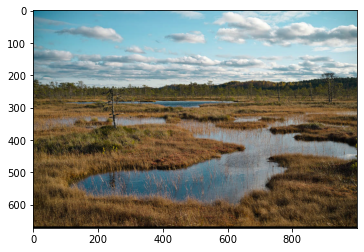

In [368]:
plt.imshow(reconstructed_img)

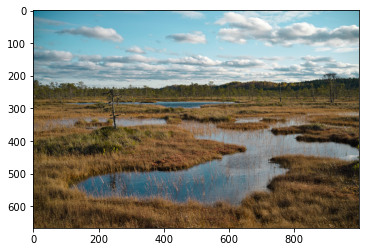

In [366]:
plt.imshow(img)

In [326]:
r_new.shape

(672, 1000)

In [348]:
min(g_new.flatten())

-32

In [339]:
new_img

array([[[ 13.,  13.,  13.],
        [ 14.,  14.,  14.],
        [ 15.,  15.,  15.],
        ...,
        [108., 108., 108.],
        [108., 108., 108.],
        [108., 108., 108.]],

       [[ 14.,  14.,  14.],
        [ 14.,  14.,  14.],
        [ 16.,  16.,  16.],
        ...,
        [109., 109., 109.],
        [108., 108., 108.],
        [108., 108., 108.]],

       [[ 14.,  14.,  14.],
        [ 15.,  15.,  15.],
        [ 16.,  16.,  16.],
        ...,
        [109., 109., 109.],
        [109., 109., 109.],
        [108., 108., 108.]],

       ...,

       [[  7.,   7.,   7.],
        [  2.,   2.,   2.],
        [ -4.,  -4.,  -4.],
        ...,
        [ -1.,  -1.,  -1.],
        [  1.,   1.,   1.],
        [  3.,   3.,   3.]],

       [[ -3.,  -3.,  -3.],
        [ -4.,  -4.,  -4.],
        [ -5.,  -5.,  -5.],
        ...,
        [ -5.,  -5.,  -5.],
        [ -6.,  -6.,  -6.],
        [ -6.,  -6.,  -6.]],

       [[ -5.,  -5.,  -5.],
        [ -1.,  -1.,  -1.],
        [  3.,  